# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** A. Kafaby Syairozie
- **Email:** fabisyairozie@student.ub.ac.id
- **ID Dicoding:** M006B4KY0002

## Menentukan Pertanyaan Bisnis

- Bebagimana perbandingan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
- Bagaimana perbandingan rata-rata penyewaan sepeda tiap harinya?
- Berapa jumlah penyewa di setiap musim?
- Apa pengaruh suhu udara dengan jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- data day_df memiliki 15 kolom
- data hour_df memiliki 16 kolom
- perebedaan keduanyanya hanya berda di kolom hr (hour)

### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- tidak ada data yang null dan duplicate
- tipe data dtday (tanggal) seharusnya menggunakan tipe datetime agar lebih mudah dalam mengolah data
- kolom instant bisa dihapus karena hanya sebagai penomoran urutan dan kemungkinan tidak akan digunakan

### Cleaning Data

In [ ]:
# mengubah tipe data dtday menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
#menghapus kolom instant
day_df.drop('instant', axis=1, inplace=True)
hour_df.drop('instant', axis=1, inplace=True)

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

**Insight:**
- kolom dteday diubah tipenya menjadi datetime
- kolom instant dihapus

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#mengganti temp, atemp, hum dan windspeedd dengan nilai aslinya
day_df['temp'] = (day_df['temp'] * 41).round(2)
day_df['atemp'] = (day_df['atemp'] * 50).round(2)
day_df['hum'] = (day_df['hum'] * 100).round(2)
day_df['windspeed'] = (day_df['windspeed'] * 67).round(2)

In [ ]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [ ]:
hour_df['temp'] = (hour_df['temp'] * 41).round(2)
hour_df['atemp'] = (hour_df['atemp'] * 50).round(2)
hour_df['hum'] = (hour_df['hum'] * 100).round(2)
hour_df['windspeed'] = (hour_df['windspeed'] * 67).round(2)

In [ ]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.40,81.0,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.64,80.0,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.64,80.0,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.40,75.0,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.40,75.0,0.0,0,1,1


In [ ]:
day_df.describe().round(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,2012-01-01 00:00:00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,20.31,23.72,62.79,12.76,848.18,3656.17,4504.35
min,2011-01-01 00:00:00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,2011-07-02 12:00:00,2.00,0.0,4.00,0.00,1.0,0.00,1.00,13.82,16.90,52.00,9.04,315.50,2497.00,3152.00
50%,2012-01-01 00:00:00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,20.43,24.34,62.67,12.13,713.00,3662.00,4548.00
75%,2012-07-01 12:00:00,3.00,1.0,10.00,0.00,5.0,1.00,2.00,26.88,30.43,73.02,15.62,1096.00,4776.50,5956.00
max,2012-12-31 00:00:00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00
std,NaN,1.11,0.5,3.45,0.17,2.0,0.47,0.54,7.51,8.15,14.24,5.19,686.62,1560.26,1937.21


In [ ]:
hour_df.describe().round(2)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,2012-01-02 04:08:34.552045568,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,20.38,23.79,62.72,12.74,35.68,153.79,189.46
min,2011-01-01 00:00:00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.82,0.00,0.00,0.00,0.00,0.00,1.00
25%,2011-07-04 00:00:00,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,13.94,16.66,48.00,7.00,4.00,34.00,40.00
50%,2012-01-02 00:00:00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,20.50,24.24,63.00,13.00,17.00,115.00,142.00
75%,2012-07-02 00:00:00,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,27.06,31.06,78.00,17.00,48.00,220.00,281.00
max,2012-12-31 00:00:00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,41.00,50.00,100.00,57.00,367.00,886.00,977.00
std,NaN,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,7.89,8.59,19.29,8.20,49.31,151.36,181.39


In [ ]:
# jumlah penyewa sepeda berdasarkan weather
weather_df = day_df.groupby(by='weathersit').agg({'cnt':'sum'})
weather_df

,cnt
weathersit,
1,2257952
2,996858
3,37869


In [ ]:
# jumlah penyewa sepeda berdasarkan temp, atemp, hum, windspeed

temp_df = day_df.groupby(by='temp').agg({'cnt':'sum'})
temp_df.head()

,cnt
temp,
2.42,981
3.96,986
3.99,1416
4.41,2368
5.23,1529


In [ ]:
atemp_df = day_df.groupby(by='atemp').agg({'cnt':'sum'})
atemp_df.head()

,cnt
atemp,
3.95,981
4.94,986
5.08,1529
5.81,822
5.90,1416


In [ ]:
hum_df = day_df.groupby(by='hum').agg({'cnt':'sum'})
hum_df.head()

,cnt
hum,
0.00,623
18.79,1635
25.42,6857
27.58,5169
29.00,5102


In [ ]:
windspeed_df = day_df.groupby(by='windspeed').agg({'cnt':'sum'})
windspeed_df.head()

,cnt
windspeed,
1.50,4985
2.83,5117
3.04,7121
3.13,5087
3.17,3068


In [ ]:
# jumlah sepeda berdasarakn musim
season_df = day_df.groupby(by='season').agg({'cnt':'sum'})
season_df

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [ ]:
# jumlah sepeda pada hari kerja/ libur
workday_df = day_df.groupby(by='workingday').agg({'cnt':'sum'})
workday_df

,cnt
workingday,
0,1000269
1,2292410


**Insight:**
- Cuaca berpengaruh terhadap penyewaan sepeda, dengan jarak yang sangat segnifikan
- suhu, kelembapan, kecepatan angin memiliki hubungan dengan jumlah penyewa sepeda
- musim dengan penyewwan terbanyak adalh 3 (fall)
- pada hari kerja penyewa lebih bnyk dari pada hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

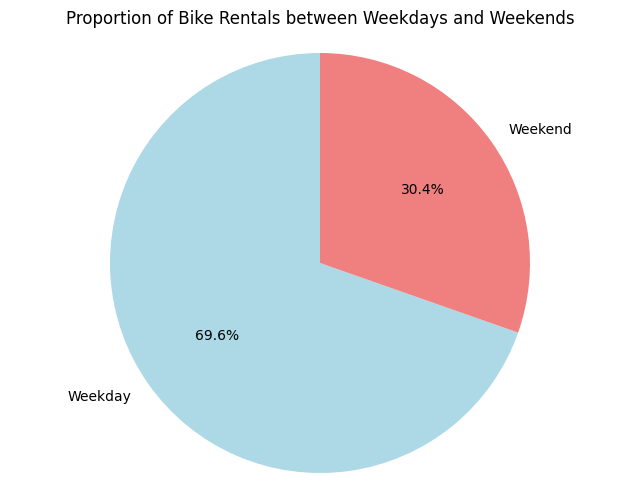

In [ ]:
day_df['workingday_desc'] = day_df['workingday'].map({0: 'Weekend', 1: 'Weekday'})

# Mengelompokkan data berdasarkan workingday_desc
weekday_rentals = day_df.groupby('workingday_desc')['cnt'].sum()
x = np.arange(len(weekday_rentals))

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(weekday_rentals, labels=weekday_rentals.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Bike Rentals between Weekdays and Weekends')
plt.axis('equal')


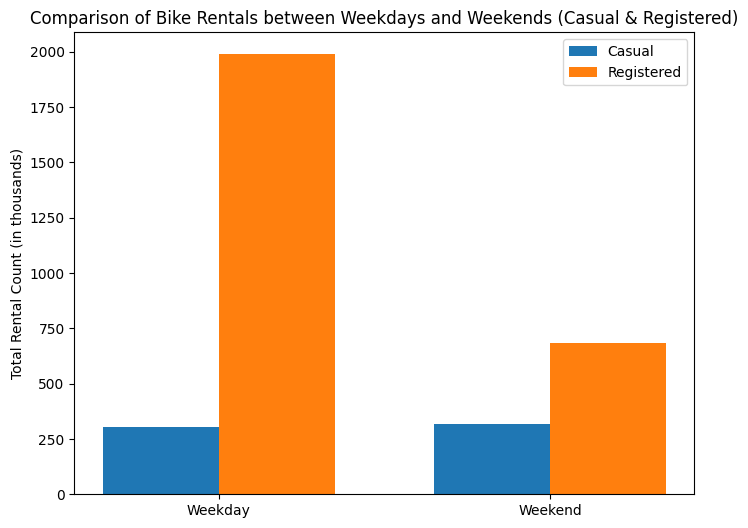

In [ ]:
# Mengelompokkan total penyewaan untuk `casual` dan `registered` berdasarkan deskripsi hari kerja
weekday_rentals_casual = day_df.groupby(by='workingday_desc')['casual'].sum()
weekday_rentals_registered = day_df.groupby(by='workingday_desc')['registered'].sum()

# Membuat bar chart
plt.figure(figsize=(8, 6))
width = 0.35
x = np.arange(len(weekday_rentals_casual))

plt.bar(x - width/2, weekday_rentals_casual.values / 1000, width, label='Casual')
plt.bar(x + width/2, weekday_rentals_registered.values / 1000, width, label='Registered')

plt.xlabel(None)
plt.ylabel('Total Rental Count (in thousands)')
plt.title('Comparison of Bike Rentals between Weekdays and Weekends (Casual & Registered)')
plt.xticks(x, weekday_rentals_casual.index)
plt.legend()
plt.show()


### Pertanyaan 2: Bagaimana perbandingan rata-rata penyewaan sepeda tiap harinya?

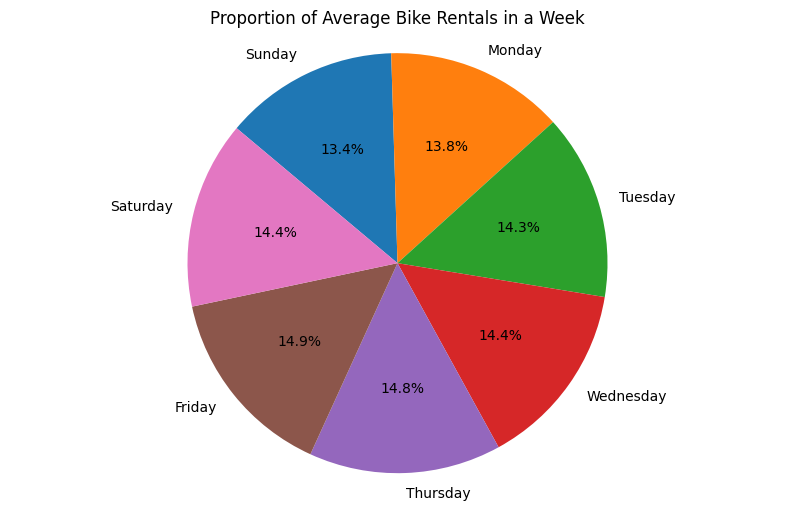

In [ ]:
#melakukan mapping(memberi nama) hari
weekday_name = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

weekday_avg_cnt = day_df.groupby(by='weekday')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.pie(weekday_avg_cnt, labels=weekday_avg_cnt.index.map(weekday_name),
        autopct='%1.1f%%', startangle=140, counterclock=False)

plt.title('Proportion of Average Bike Rentals in a Week')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.show()


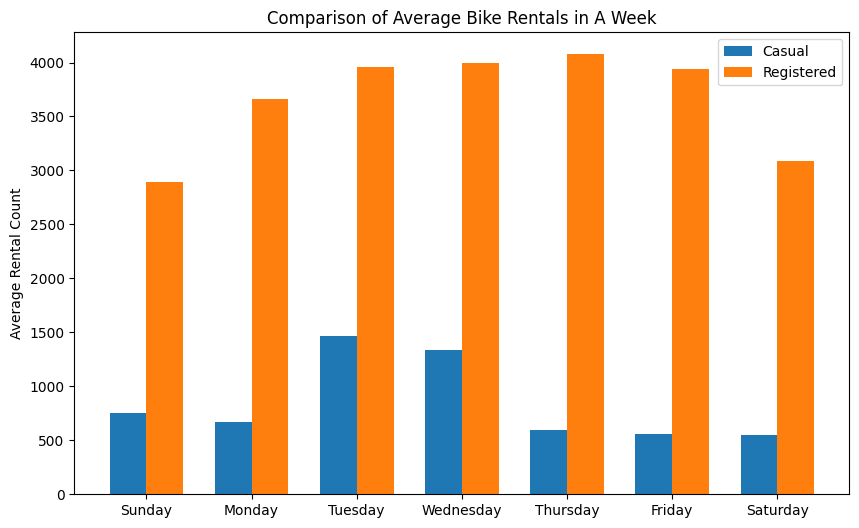

In [ ]:

day_df['weekday_name'] = day_df['weekday'].map(weekday_name)

#menghitung rata-rata
weekday_avg_casual = day_df.groupby(by='weekday_name')['casual'].mean()
weekday_avg_registered = day_df.groupby(by='weekday')['registered'].mean()

#membuat chart
plt.figure(figsize=(10, 6))
x = np.arange(7)

plt.bar(x - width/2, weekday_avg_casual, width, label='Casual')
plt.bar(x + width/2, weekday_avg_registered, width, label='Registered')

plt.xlabel(None)
plt.ylabel('Average Rental Count')
plt.title('Comparison of Average Bike Rentals in A Week')
plt.xticks(x, weekday_name.values())
plt.legend()
plt.show()


### Pertanyaan 3: Berapa jumlah penyewa di setiap musim?


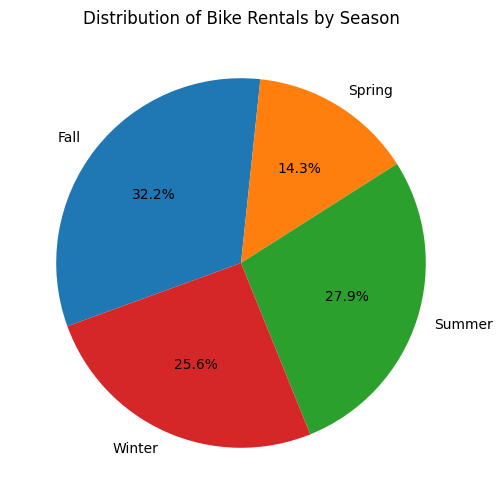

In [ ]:
#melakukan mapping season
day_df['season_desc'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

#menghitung jumlah penyewa sepeda tiap season
season_cnt = day_df.groupby(by='season_desc')['cnt'].sum()

#membuat pie
plt.figure(figsize=(8, 6))
plt.pie(season_cnt, labels=season_cnt.index, autopct='%1.1f%%', startangle=200, counterclock=False)
plt.title('Distribution of Bike Rentals by Season')
plt.show()


### Pertanyaan 4: Apa pengaruh suhu udara pada jumlah penyewa sepeda?


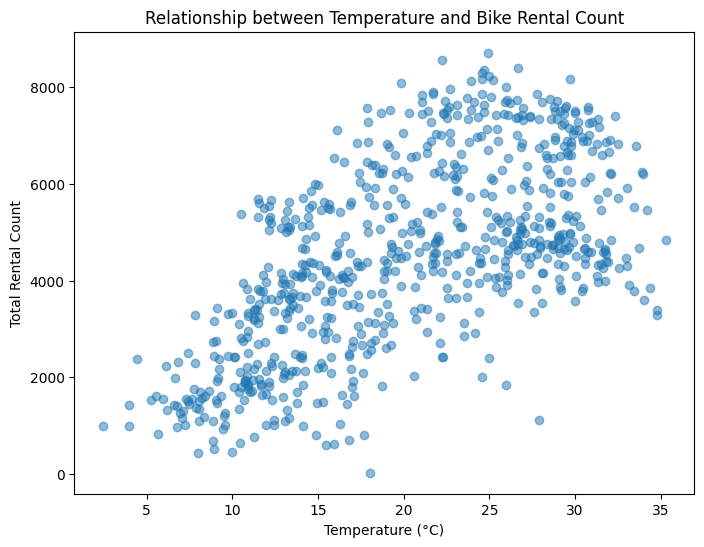

Correlation between temperature and rental count: 0.6274933901643388


In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(day_df['temp'], day_df['cnt'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rental Count')
plt.title('Relationship between Temperature and Bike Rental Count')
plt.show()


In [ ]:
# menghitung korelasi
correlation = day_df['temp'].corr(day_df['cnt'])
print(f"Correlation antara temperature dan jumlah rental: {correlation}")

Correlation antara temperature dan jumlah rental: 0.6274933901643388


**Insight:**
- Jumlah penyewaan di weekdays lebih banyak dari pada di weekend mencapai 2 kali lebih
- Rata-rata jumlah sepeda yang disewa tiap harinya hampir sama yaitu -+14% atau sekitar 4000 sepeda
- Pada musim gugur (fall) menjadi musim terbanyak orang menyewa sepeda
- Adanya hubungan/ korelasi yang positif antara suhu dan jumlah penyewaan, artinya suhu meningkat jumlah penyewaan juga cenderung meningkat

## Analisis Lanjutan (Opsional)

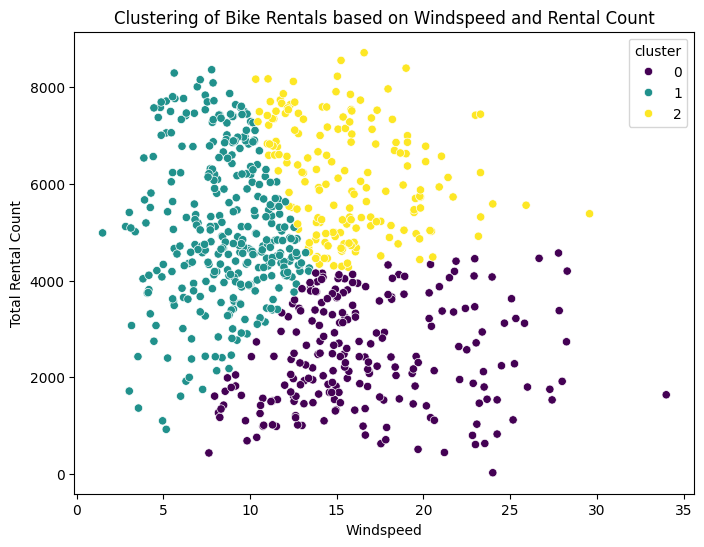

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = day_df[['windspeed', 'cnt']]

# Skala data fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster
n_clusters = 3

# Clustering dengan KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

day_df['cluster'] = kmeans.labels_

# Visualisasi cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windspeed', y='cnt', hue='cluster', data=day_df, palette='viridis')
plt.xlabel('Windspeed')
plt.ylabel('Total Rental Count')
plt.title('Clustering of Bike Rentals based on Windspeed and Rental Count')
plt.show()



Berdasarkan hasil clustering,  dapat menyimpulkan bahwa:
1. Terdapat 3 kelompok penyewa sepeda berdasarkan kecepatan angin dan jumlah penyewaan.
2. Setiap kelompok kemungkinan mewakili pola perilaku penyewaan yang berbeda. Misalnya:
 - Kelompok 0: Penyewaan sepeda yang cenderung tinggi pada kecepatan angin rendah dan menengah.
 - Kelompok 1: Penyewaan sepeda yang cenderung tinggi pada kecepatan angin yang lebih tinggi.
 - Kelompok 2: Penyewaan sepeda yang cenderung rendah secara keseluruhan, terutama pada kecepatan angin tinggi.


Analsis lainnya yang bisa dilakukan antara lain
- korelasi kelmebapan, kecepatan angin dan cuaca dengan jumlah sepeda
- rata-rata jumlah penyewaan tiap jam
- dll

## Conclusion

- Jumlah penyewaan di weekdays lebih banyak dari pada di weekend mencapai 2 kali lebih
- Rata-rata jumlah sepeda yang disewa tiap harinya hampir sama yaitu -+14% atau sekitar 4000 sepeda
- Pada musim gugur (fall) menjadi musim terbanyak orang menyewa sepeda
- Adanya hubungan/ korelasi yang positif antara suhu dan jumlah penyewaan, artinya suhu meningkat jumlah penyewaan juga cenderung meningkat
- clustering membantu mengidentifikasi pola penyewaan yang kompleks berdasarkan variabel kecepatan angin dan jumlah penyewaan